In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# Situacao de azar, onde as classes estão ordenadas
dados_azar = dados.sort_values('vendido', ascending=True)
X_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
dados_azar.tail()

,preco,vendido,idade_do_modelo,km_por_ano
5491,71910.43,1,9,25778.40812
1873,30456.53,1,6,15468.97608
1874,69342.41,1,11,16909.33538
5499,70520.39,1,16,19622.68262
0,30941.02,1,18,35085.22134


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy = 'stratified')
results = cross_validate(modelo, X_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()*1
print('Accuracy com dummy stratified, 10 = {%.2f, %.2f}' % ((media - 2 * desvio_padrao)*100,(media + 2 * desvio_padrao)*100))

Accuracy com dummy stratified, 10 = {49.79, 53.45}


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, X_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()*1
print('Accuracy com cross validate, 10 = {%.2f, %.2f}' % ((media - 2 * desvio_padrao)*100,(media + 2 * desvio_padrao)*100))

Accuracy com cross validate, 10 = {73.83, 77.73}


In [5]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento

np.random.seed(SEED)

dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size = 10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio = results['test_score'].std() * 100
    print('Acuracia média = %.2f' % media)
    print('Intervalo = [%.2f, %.2f]' % (media - 2*desvio, media + 2*desvio))

In [7]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)

results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Acuracia média = 75.78
Intervalo = [73.67, 77.90]


In [11]:
# GroupKFold em um pipeline com StandarScaler e SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('scaler', scaler), ('estimador', modelo)])
                    
cv = GroupKFold(n_splits = 10)
resulst = cross_validate(pipeline, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Acuracia média = 75.78
Intervalo = [73.67, 77.90]


In [12]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)

results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Acuracia média = 75.78
Intervalo = [73.67, 77.90]


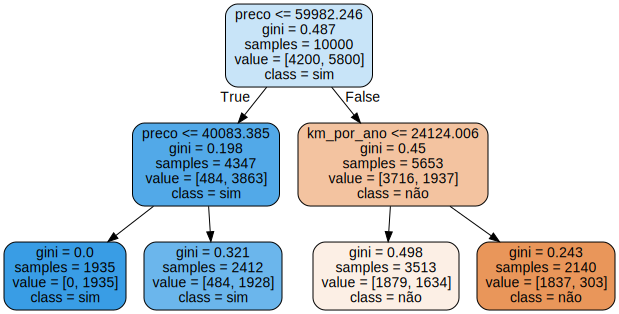

In [8]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                        class_names=['não','sim'], 
                        feature_names = X_azar.columns)
graph = graphviz.Source(dot_data)
graph

In [9]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 3)

results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Acuracia média = 78.67
Intervalo = [76.40, 80.94]


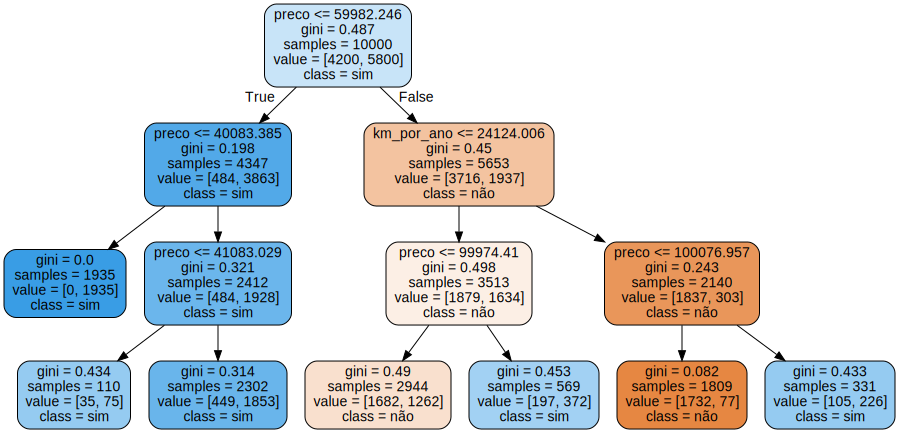

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(X_azar, y_azar)
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                        class_names=['não','sim'], 
                        feature_names = X_azar.columns)
graph = graphviz.Source(dot_data)
graph

In [16]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 10)

results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Acuracia média = 77.19
Intervalo = [75.26, 79.13]


## Explorando hiperparâmetros em uma dimensão

In [17]:
def roda_arvore_decisao(max_depth = 3):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth = max_depth)

    results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("max_depth = %d - medias treino = %.2f - teste = %.2f" % (max_depth, train_score, test_score))
    tabela = [max_depth, train_score, test_score]
    return tabela
    
resultados = [roda_arvore_decisao(i) for i in range(1,16)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'treino', 'teste'])
resultados.head()

max_depth = 1 - medias treino = 75.79 - teste = 75.78
max_depth = 2 - medias treino = 75.79 - teste = 75.78
max_depth = 3 - medias treino = 78.75 - teste = 78.67
max_depth = 4 - medias treino = 78.79 - teste = 78.63
max_depth = 5 - medias treino = 78.94 - teste = 78.56
max_depth = 6 - medias treino = 79.17 - teste = 78.12
max_depth = 7 - medias treino = 79.50 - teste = 77.96
max_depth = 8 - medias treino = 79.89 - teste = 77.86
max_depth = 9 - medias treino = 80.46 - teste = 77.38
max_depth = 10 - medias treino = 81.16 - teste = 77.19
max_depth = 11 - medias treino = 82.03 - teste = 76.97
max_depth = 12 - medias treino = 82.89 - teste = 76.49
max_depth = 13 - medias treino = 83.95 - teste = 75.81
max_depth = 14 - medias treino = 85.03 - teste = 75.66
max_depth = 15 - medias treino = 86.14 - teste = 75.16


,max_depth,treino,teste
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<AxesSubplot:xlabel='max_depth', ylabel='teste'>

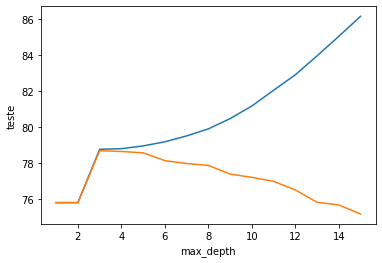

In [18]:
import seaborn as sns

sns.lineplot(data = resultados, x='max_depth', y='treino')
sns.lineplot(data = resultados, x='max_depth', y='teste')

## Explorando hiperparâmetros em mais de uma dimensão

In [11]:
def roda_arvore_decisao(max_depth = 3, min_samples_leaf = 200):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)

    results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("max_depth = %d, min_samples_leaf = %d - medias treino = %.2f - teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
    tabela = [max_depth, min_samples_leaf, train_score, test_score]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            resultados.append(roda_arvore_decisao(max_depth, min_samples_leaf))
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'treino', 'teste'])
    return resultados

resultados = busca()
resultados.head()

max_depth = 1, min_samples_leaf = 32 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 64 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 128 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 256 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 32 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 64 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 128 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 256 - medias treino = 75.79 - teste = 75.78
max_depth = 3, min_samples_leaf = 32 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 64 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 128 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 256 - medias treino = 78.75 - teste = 78.67
max_depth = 4, min_samples_leaf = 32 - medias treino = 78.75 - teste =

max_depth = 27, min_samples_leaf = 64 - medias treino = 79.79 - teste = 77.30
max_depth = 27, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 27, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 28, min_samples_leaf = 32 - medias treino = 80.89 - teste = 76.84
max_depth = 28, min_samples_leaf = 64 - medias treino = 79.79 - teste = 77.30
max_depth = 28, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 28, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 29, min_samples_leaf = 32 - medias treino = 80.89 - teste = 76.84
max_depth = 29, min_samples_leaf = 64 - medias treino = 79.79 - teste = 77.30
max_depth = 29, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 29, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 30, min_samples_leaf = 32 - medias treino = 80.89 - teste = 76.84
max_depth = 30, min_samples_leaf = 64 - medias treino = 79

,max_depth,min_samples_leaf,treino,teste
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [45]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,treino,teste
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [12]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,treino,teste
max_depth,1.000000,0.000000,0.536705,-0.027675
min_samples_leaf,0.000000,1.000000,-0.409676,0.349011
treino,0.536705,-0.409676,1.000000,0.116466
teste,-0.027675,0.349011,0.116466,1.000000


<AxesSubplot:>

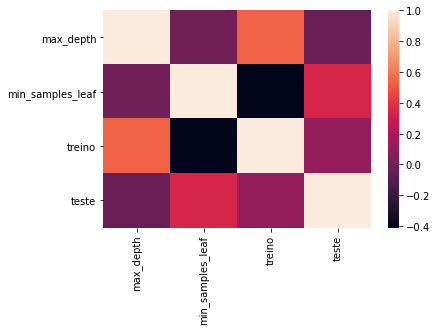

In [14]:
import seaborn as sns

sns.heatmap(corr)

array([[<AxesSubplot:xlabel='max_depth', ylabel='max_depth'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='max_depth'>,
        <AxesSubplot:xlabel='treino', ylabel='max_depth'>,
        <AxesSubplot:xlabel='teste', ylabel='max_depth'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='treino', ylabel='min_samples_leaf'>,
        <AxesSubplot:xlabel='teste', ylabel='min_samples_leaf'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='treino'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='treino'>,
        <AxesSubplot:xlabel='treino', ylabel='treino'>,
        <AxesSubplot:xlabel='teste', ylabel='treino'>],
       [<AxesSubplot:xlabel='max_depth', ylabel='teste'>,
        <AxesSubplot:xlabel='min_samples_leaf', ylabel='teste'>,
        <AxesSubplot:xlabel='treino', ylabel='teste'>,
        <AxesSubplot:xlabel='teste', ylabel='teste'>]], dty

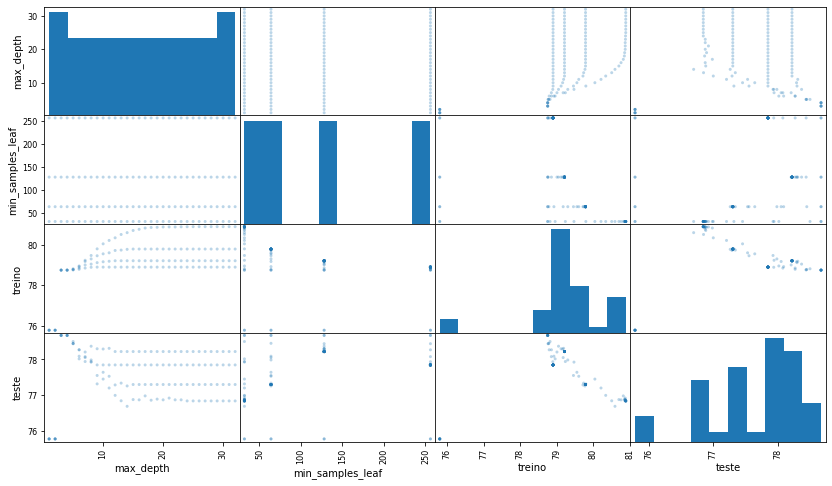

In [15]:
pd.plotting.scatter_matrix(resultados, figsize = (14,8), alpha = 0.3)

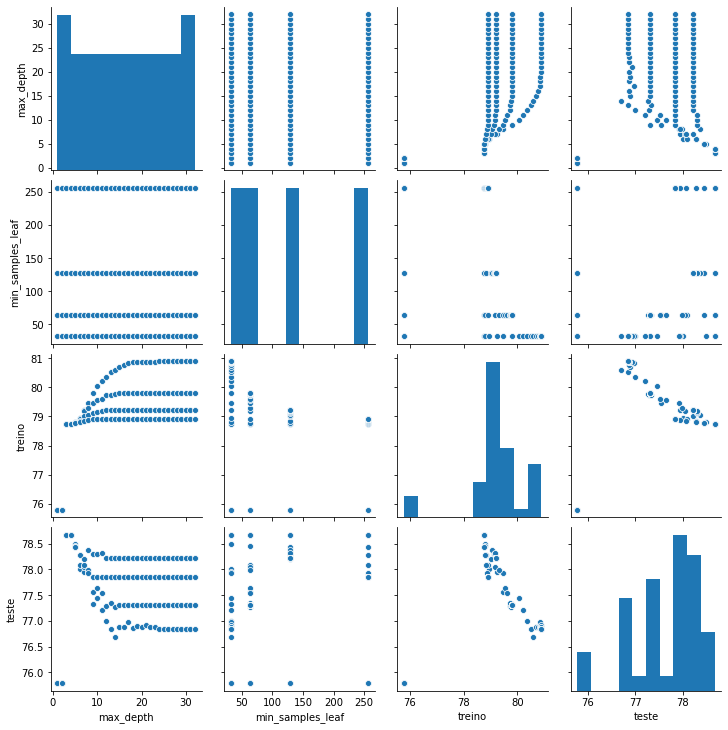

In [16]:
sns.pairplot(resultados)

<AxesSubplot:>

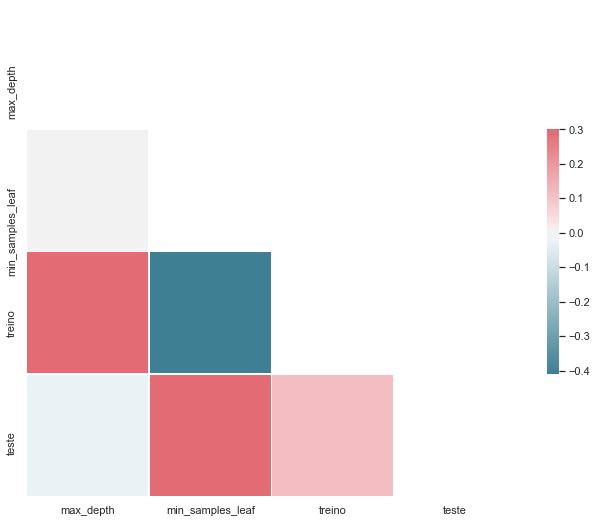

In [17]:
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [18]:
def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            resultados.append(roda_arvore_decisao(max_depth, min_samples_leaf))
    resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'treino', 'teste'])
    return resultados

resultados = busca()
resultados.head()

max_depth = 1, min_samples_leaf = 128 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 192 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 256 - medias treino = 75.79 - teste = 75.78
max_depth = 1, min_samples_leaf = 512 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 128 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 192 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 256 - medias treino = 75.79 - teste = 75.78
max_depth = 2, min_samples_leaf = 512 - medias treino = 75.79 - teste = 75.78
max_depth = 3, min_samples_leaf = 128 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 192 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 256 - medias treino = 78.75 - teste = 78.67
max_depth = 3, min_samples_leaf = 512 - medias treino = 77.53 - teste = 77.50
max_depth = 4, min_samples_leaf = 128 - medias treino = 78.75 - 

max_depth = 27, min_samples_leaf = 192 - medias treino = 79.01 - teste = 78.05
max_depth = 27, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 27, min_samples_leaf = 512 - medias treino = 77.53 - teste = 77.50
max_depth = 28, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 28, min_samples_leaf = 192 - medias treino = 79.01 - teste = 78.05
max_depth = 28, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 28, min_samples_leaf = 512 - medias treino = 77.53 - teste = 77.50
max_depth = 29, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 29, min_samples_leaf = 192 - medias treino = 79.01 - teste = 78.05
max_depth = 29, min_samples_leaf = 256 - medias treino = 78.90 - teste = 77.85
max_depth = 29, min_samples_leaf = 512 - medias treino = 77.53 - teste = 77.50
max_depth = 30, min_samples_leaf = 128 - medias treino = 79.21 - teste = 78.22
max_depth = 30, min_samples_leaf = 192 - medias trei

,max_depth,min_samples_leaf,treino,teste
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [19]:
corr = resultados.corr()

<AxesSubplot:>

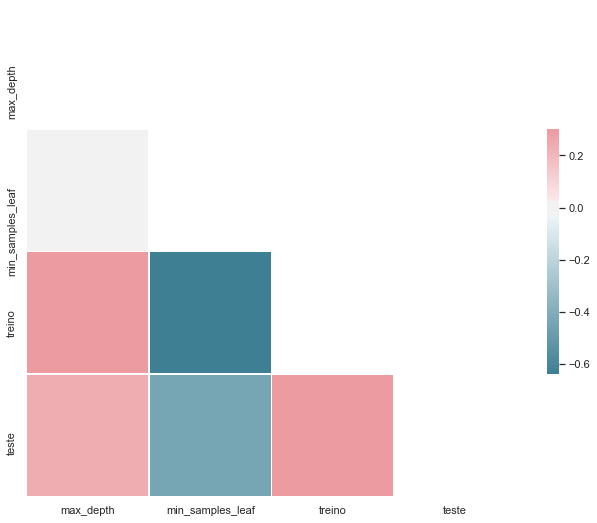

In [20]:
from string import ascii_letters
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [21]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,treino,teste
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


## Explorando hiperparâmetros com 3 dimensões

In [24]:
def roda_arvore_decisao(max_depth = 3, min_samples_leaf = 200, min_samples_split = 2):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth = max_depth, 
                                    min_samples_leaf = min_samples_leaf, 
                                    min_samples_split = min_samples_split)

    results = cross_validate(modelo, X_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    #print( ("max_depth = %d, min_samples_leaf = %d, min_samples_split =%d - "
    #        "medias treino = %.2f - teste = %.2f") % (max_depth, 
    #                                                  min_samples_leaf, 
    #                                                  min_samples_split, 
    #                                                  train_score, 
    #                                                  test_score))
    
    tabela = [max_depth, min_samples_leaf, min_samples_split, 
              train_score, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            for min_samples_split in [32, 64, 128, 256]:
                resultados.append(roda_arvore_decisao(max_depth, min_samples_leaf, min_samples_split))
    resultados = pd.DataFrame(resultados, columns=['max_depth', 
                                                   'min_samples_leaf', 
                                                   'min_samples_split', 
                                                   'treino', 
                                                   'teste',
                                                   'fit_time', 
                                                   'score_time'])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
0,1,128,32,75.791169,75.784219,0.007693,0.002601
1,1,128,64,75.791169,75.784219,0.009372,0.000303
2,1,128,128,75.791169,75.784219,0.006256,0.002215
3,1,128,256,75.791169,75.784219,0.005340,0.003124
4,1,192,32,75.791169,75.784219,0.007814,0.000651


<AxesSubplot:>

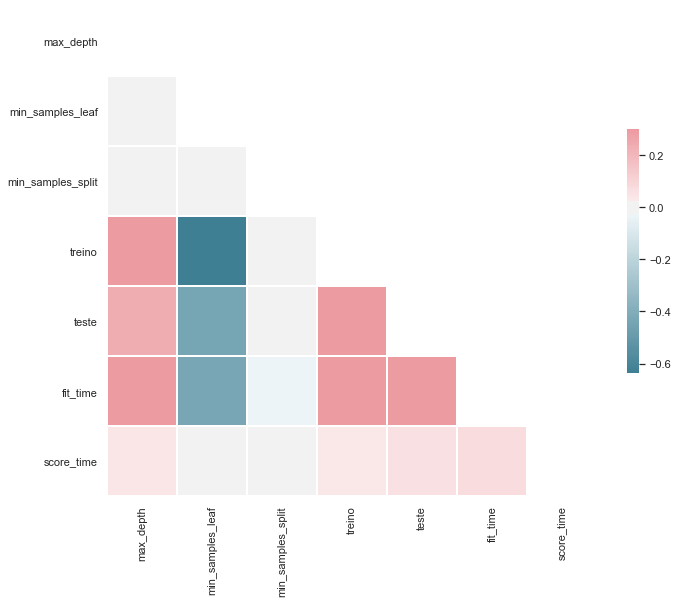

In [25]:
corr = resultados.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [26]:
resultados.sort_values('teste', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,treino,teste,fit_time,score_time
54,4,192,128,78.750993,78.672633,0.015392,0.002199
55,4,192,256,78.750993,78.672633,0.013094,0.002599
32,3,128,32,78.750993,78.672633,0.010919,0.003540
33,3,128,64,78.750993,78.672633,0.012337,0.003562
34,3,128,128,78.750993,78.672633,0.011895,0.002701


## Usando o GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = GroupKFold(n_splits = 10))

busca.fit(X_azar, y_azar, groups = dados.modelo)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016588,0.003414,0.003900,0.001637,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.014390,0.006098,0.004464,0.004452,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.016280,0.001949,0.003775,0.006229,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.016418,0.007257,0.002213,0.004873,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.016285,0.004331,0.005005,0.005837,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [33]:
print(busca.best_params_)
print(busca.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [35]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [39]:
from sklearn.metrics import accuracy_score

# evitar essa abordagem pois estará sendo otimista

predicoes = melhor.predict(X_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100

print('Accuracy para os dados foi %.2f%%' % accuracy)

Accuracy para os dados foi 78.75%


## Como ter uma estimativa sem esse vício nos dados que eu já vi?
No caso de cross validation com busca de hiperparâmetros, fazemos uma nova validação cruzada. Chama-se nested cross validation.

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X_azar, y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)

D:\ProgramData\Anaconda3\envs\alura_pandas\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\envs\alura_pandas\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\Anaconda3\envs\alura_pandas\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "D:\ProgramData\Anaconda3\envs\alura_pandas\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "D:\ProgramData\Anaconda3\envs\alura_pandas\lib\site-packages\sklearn\model_selection\_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "D:\ProgramData\Anaconda3\envs\alura_pan

## Infelizmente como o sklearn não suporta nested validation com group k fold, não conseguimos prever o resultado para novos grupos

In [43]:
from sklearn.model_selection import KFold

espaco_de_parametros = {
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle=True))

busca.fit(X_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011396,0.001505,0.002799,0.000400,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7795,0.7785,0.806,0.7905,0.78,0.7869,0.010495,1
1,0.011397,0.000486,0.002995,0.000639,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7795,0.7785,0.806,0.7905,0.78,0.7869,0.010495,1
2,0.010988,0.001551,0.003403,0.001364,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7795,0.7785,0.806,0.7905,0.78,0.7869,0.010495,1
3,0.013609,0.004723,0.001799,0.001469,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7795,0.7785,0.806,0.7905,0.78,0.7869,0.010495,1
4,0.009079,0.007819,0.004324,0.005806,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7795,0.7785,0.806,0.7905,0.78,0.7869,0.010495,1


In [44]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
scores

array([0.782 , 0.784 , 0.791 , 0.781 , 0.7965])

In [46]:
def imprime_score(scores):
    media = scores.mean() * 100
    desvio = scores.std() * 100
    print('Acuracia média = %.2f' % media)
    print('Intervalo = [%.2f, %.2f]' % (media - 2*desvio, media + 2*desvio))

In [47]:
imprime_score(scores)

Acuracia média = 78.69
Intervalo = [77.50, 79.88]


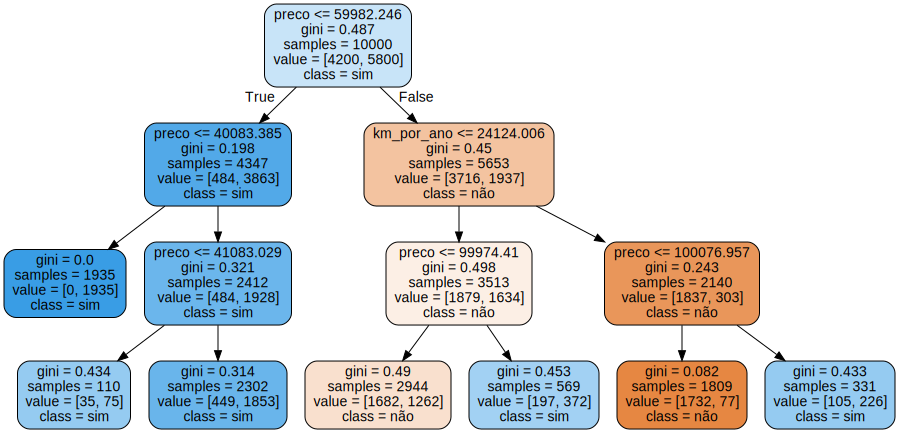

In [48]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, 
                        class_names=['não','sim'], 
                        feature_names = X_azar.columns)
graph = graphviz.Source(dot_data)
graph

# Parte 2 - Exploração aleatória

In [50]:
from sklearn.model_selection import RandomizedSearchCV

espaco_de_parametros = {
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED, n_iter = 16)

busca.fit(X_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013996,0.001091,0.002798,0.000400,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7875,0.778,0.7915,0.7775,0.7885,0.7846,0.005748,16
1,0.010589,0.000487,0.002999,0.000001,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7915,0.778,0.7915,0.7850,0.7885,0.7869,0.005054,1
2,0.011192,0.000980,0.003124,0.000677,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7915,0.778,0.7915,0.7850,0.7885,0.7869,0.005054,1
3,0.020784,0.002138,0.002799,0.000748,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7915,0.778,0.7915,0.7850,0.7885,0.7869,0.005054,1
4,0.020192,0.000753,0.002799,0.000748,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7915,0.778,0.7915,0.7850,0.7885,0.7869,0.005054,1


In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
imprime_score(scores)

Acuracia média = 78.68
Intervalo = [77.28, 80.08]


In [52]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


## Customizando o espaço de hiperparâmetros

In [53]:
from scipy.stats import randint

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED, n_iter = 16)

busca.fit(X_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018789,0.002134,0.003998,0.000893,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7785,0.7875,0.7735,0.8020,0.7940,0.7871,0.010283,1
1,0.027183,0.005452,0.004799,0.000748,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7660,0.7835,0.7675,0.7810,0.7900,0.7776,0.009346,12
2,0.019389,0.001854,0.003399,0.000489,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7710,0.7885,0.7660,0.7930,0.7875,0.7812,0.010652,6
3,0.022189,0.001332,0.003199,0.000401,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7635,0.7745,0.7590,0.7790,0.7670,0.7686,0.007262,15
4,0.016798,0.000404,0.002990,0.000011,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7710,0.7885,0.7660,0.7925,0.7875,0.7811,0.010542,7


In [55]:
scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Acuracia média = 78.70
Intervalo = [77.72, 79.68]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [58]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
    print("%.3f +=(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))
    

0.787 +=(0.021) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +=(0.017) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.784 +=(0.017) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.782 +=(0.022) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.781 +=(0.019) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.781 +=(0.021) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.781 +=(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.781 +=(0.019) {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 104, 'min_samples_split': 88}
0.781 +=(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +=(0.017) {'criterion': 'gini', 'max_depth':

## Exploração aleatória maior

In [61]:
SEED = 564
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32,128),
    "min_samples_leaf" : randint(32,128),
    "criterion" : ['gini', 'entropy']
}

busca = RandomizedSearchCV(DecisionTreeClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle=True),
                          random_state = SEED, n_iter = 64)

busca.fit(X_azar, y_azar)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031977,0.004649,0.003203,0.000398,entropy,None,84,103,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.7780,0.7745,0.7735,0.7620,0.7625,0.7701,0.006583,62
1,0.010798,0.001175,0.002998,0.000014,gini,3,53,60,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7905,0.7855,0.7915,0.7905,0.7765,0.7869,0.005607,1
2,0.017790,0.000742,0.002199,0.000400,gini,30,118,61,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.7775,0.7745,0.7785,0.7720,0.7875,0.7780,0.005273,18
3,0.030374,0.000487,0.003403,0.000487,entropy,None,53,85,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.7710,0.7780,0.7760,0.7650,0.7655,0.7711,0.005295,57
4,0.020983,0.002098,0.003199,0.000979,gini,10,44,67,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.7755,0.7780,0.7835,0.7695,0.7735,0.7760,0.004669,29


In [62]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.head(10).iterrows():
    print("%.3f +=(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))
    

0.787 +=(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 33, 'min_samples_split': 77}
0.787 +=(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 38, 'min_samples_split': 113}
0.787 +=(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 60}
0.787 +=(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 61, 'min_samples_split': 86}
0.787 +=(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 49, 'min_samples_split': 58}
0.787 +=(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 58, 'min_samples_split': 118}
0.787 +=(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 122, 'min_samples_split': 117}
0.786 +=(0.013) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 39, 'min_samples_split': 73}
0.786 +=(0.013) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 65}
0.786 +=(0.014) {'criterion': 'entropy', 'max_depth': 5, 

In [63]:
scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Acuracia média = 78.69
Intervalo = [77.64, 79.74]
DecisionTreeClassifier(max_depth=3, min_samples_leaf=53, min_samples_split=60)


## Comparando GridSearchCV com RandomizeSearchCV (1 comparação)

In [65]:
from sklearn.ensemble import RandomForestClassifier
import time

espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [False, True],
    "criterion" : ['gini', 'entropy']
}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 285.54 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054783,0.005147,0.006385,0.000791,False,gini,3,32,32,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7860,0.7745,0.7330,0.7730,0.7705,0.7674,0.018004,119
1,0.440939,0.012048,0.028387,0.000802,False,gini,3,32,32,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7795,0.7790,0.7745,0.7725,0.7695,0.7750,0.003821,54
2,0.044757,0.002044,0.005406,0.000483,False,gini,3,32,64,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7820,0.7635,0.7755,0.7460,0.7720,0.7678,0.012428,116
3,0.441704,0.015191,0.031177,0.002319,False,gini,3,32,64,100,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7805,0.7790,0.7750,0.7715,0.7705,0.7753,0.003957,31
4,0.047581,0.002571,0.005593,0.000792,False,gini,3,32,128,10,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7695,0.7800,0.7400,0.7705,0.7655,0.7651,0.013422,126


In [66]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.head(5).iterrows():
    print("%.3f +=(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.781 +=(0.016) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.780 +=(0.013) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.779 +=(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.779 +=(0.013) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +=(0.007) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 128, 'n_estimators': 10}


In [67]:
tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Tempo 1107.17 segundos
Acuracia média = 77.14
Intervalo = [74.56, 79.72]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=32, min_samples_split=128,
                       n_estimators=10)


In [69]:
espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [False, True],
    "criterion" : ['gini', 'entropy']
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 20,
                     cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 34.88 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.645028,0.047537,0.032382,0.002142,100,64,128,3,entropy,False,"{'n_estimators': 100, 'min_samples_split': 64,...",0.7745,0.7660,0.7915,0.7690,0.7735,0.7749,0.008851,9
1,0.061959,0.003735,0.006801,0.001162,10,32,128,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7775,0.7620,0.7400,0.7460,0.7735,0.7598,0.014753,20
2,0.049976,0.011261,0.006192,0.000971,10,64,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7690,0.7670,0.7900,0.7655,0.7700,0.7723,0.008987,16
3,0.057358,0.007136,0.007001,0.001790,10,128,32,5,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7770,0.7535,0.7910,0.7730,0.7745,0.7738,0.011994,14
4,0.045578,0.003274,0.005993,0.000008,10,64,128,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7725,0.7205,0.7910,0.7695,0.7670,0.7641,0.023378,18


In [70]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.head(5).iterrows():
    print("%.3f +=(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.780 +=(0.014) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.777 +=(0.015) {'n_estimators': 100, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.777 +=(0.017) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.777 +=(0.014) {'n_estimators': 10, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +=(0.012) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}


In [71]:
tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar, 
                         cv = KFold(n_splits = 5, shuffle=True))
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
imprime_score(scores)

melhor = busca.best_estimator_
print(melhor)

Tempo 143.88 segundos
Acuracia média = 77.62
Intervalo = [75.96, 79.28]
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       min_samples_leaf=64, min_samples_split=128,
                       n_estimators=10)


In [73]:
espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [False, True],
    "criterion" : ['gini', 'entropy']
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 80,
                     cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 147.99 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.291046,0.031484,0.012984,0.000625,False,entropy,5,70,126,32,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7735,0.7755,0.7785,0.7625,0.7710,0.7722,0.005437,65
1,0.207472,0.010716,0.013001,0.000010,True,entropy,5,76,55,33,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7715,0.7885,0.7790,0.7650,0.7770,0.7762,0.007840,10
2,0.348399,0.010094,0.022796,0.001470,True,entropy,3,43,85,70,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7720,0.7710,0.7785,0.7630,0.7740,0.7717,0.005056,70
3,0.440114,0.011616,0.026002,0.002916,True,entropy,5,101,45,73,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7725,0.7850,0.7780,0.7635,0.7745,0.7747,0.007033,48
4,0.243465,0.016629,0.015123,0.002694,False,entropy,4,108,112,31,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7725,0.7925,0.7780,0.7640,0.7745,0.7763,0.009320,9


In [74]:
resultados_ordenados_pela_media = resultados.sort_values('mean_test_score', ascending=False)
for indice, linha in resultados_ordenados_pela_media.head(5).iterrows():
    print("%.3f +=(%.3f) %s" % (linha.mean_test_score, linha.std_test_score * 2, linha.params))

0.779 +=(0.023) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 93, 'min_samples_split': 86, 'n_estimators': 11}
0.777 +=(0.012) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 80, 'min_samples_split': 86, 'n_estimators': 18}
0.777 +=(0.017) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 125, 'n_estimators': 30}
0.777 +=(0.016) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 119, 'min_samples_split': 72, 'n_estimators': 57}
0.777 +=(0.016) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 116, 'min_samples_split': 41, 'n_estimators': 69}


## Se eu não posso ou não consigo usar cross validation

In [77]:
# 0.6 treino    => treino
# 0.2 teste     => dev teste
# 0.2 validacao => validacao
from sklearn.model_selection import train_test_split

SEED = 301
np.random.seed(SEED)

X_train_test, X_validate,  y_train_test, y_validate = train_test_split(X_azar, y_azar, test_size = 0.2, 
                                                                       shuffle = True, stratify = y_azar)
print(X_train_test.shape)
print(X_validate.shape)
print(y_train_test.shape)
print(y_validate.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 301
np.random.seed(SEED)

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3,6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [False, True],
    "criterion" : ['gini', 'entropy']
}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(), 
                     espaco_de_parametros, 
                     n_iter = 10,
                     cv = split)
busca.fit(X_train_test, y_train_test)
tac = time.time()

tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)

resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo 3.40 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.378781,0.0,0.025984,0.0,True,gini,3,50,93,89,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7710,0.7710,0.0,6
1,0.284836,0.0,0.023989,0.0,False,gini,3,88,104,80,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7715,0.0,2
2,0.277840,0.0,0.023007,0.0,False,gini,3,126,84,77,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7715,0.0,2
3,0.190868,0.0,0.017993,0.0,False,gini,3,57,73,50,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7715,0.0,2
4,0.284833,0.0,0.021988,0.0,False,gini,4,52,88,68,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7750,0.7750,0.0,1


In [80]:
tic = time.time()
scores = cross_val_score(busca, X_validate, y_validate, cv = split)
tac = time.time()
tempo_que_passou = tac - tic
print("Tempo %.2f segundos" % tempo_que_passou)
scores

Tempo 1.83 segundos


array([0.768])